In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np 

In [14]:
# Define the currency pair symbol
currency_pair = "EURUSD=X"

In [16]:
# Download historical data
data = yf.download(currency_pair, start="2023-01-01", end="2023-10-25")


[*********************100%%**********************]  1 of 1 completed


In [17]:
data 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1.070973,1.071237,1.065326,1.070973,1.070973,0
2023-01-03,1.067771,1.068262,1.052155,1.067771,1.067771,0
2023-01-04,1.054685,1.063151,1.054596,1.054685,1.054685,0
2023-01-05,1.060637,1.063264,1.051558,1.060637,1.060637,0
2023-01-06,1.052222,1.062225,1.048526,1.052222,1.052222,0
...,...,...,...,...,...,...
2023-10-18,1.057306,1.059547,1.052709,1.057306,1.057306,0
2023-10-19,1.053852,1.058537,1.052886,1.053852,1.053852,0
2023-10-20,1.058649,1.060108,1.056580,1.058649,1.058649,0


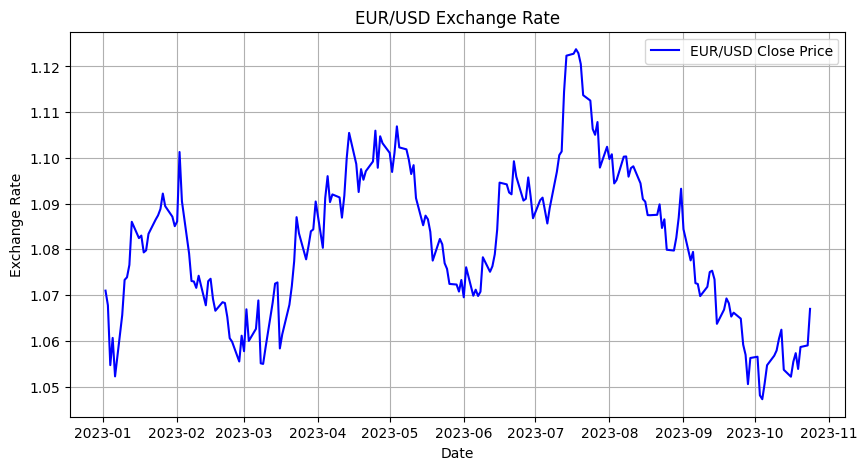

In [18]:
# Plot the closing prices
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label="EUR/USD Close Price", color='b')
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("EUR/USD Exchange Rate")
plt.legend()
plt.grid(True)
plt.show()




In [19]:
data.std()

Open         0.016688
High         0.016524
Low          0.016613
Close        0.016688
Adj Close    0.016688
Volume       0.000000
dtype: float64

In [44]:
# Parameters
num_simulations = 5
num_time_steps = 100
initial_rates = 0.052 # Initial short-term rate
volatility = 0.016

In [45]:
# Simulate forward rates using the HJM model
dt = 2/12 / num_time_steps
rates = np.zeros((num_simulations, num_time_steps))
rates[:, 0] = initial_rates

for t in range(1, num_time_steps):
    dW = np.random.normal(0, np.sqrt(dt), num_simulations)
    dR = volatility * rates[:, t - 1] * dW
    rates[:, t] = rates[:, t - 1] + dR

In [46]:
rates[-1]

array([0.052     , 0.05207803, 0.05204448, 0.0520508 , 0.05206568,
       0.05207449, 0.05207835, 0.05208001, 0.05205986, 0.05210237,
       0.05212169, 0.05215711, 0.0521635 , 0.05215876, 0.05211469,
       0.05208265, 0.05210134, 0.0520781 , 0.05207963, 0.05202343,
       0.05199428, 0.05198457, 0.05192616, 0.05188794, 0.05194484,
       0.05189602, 0.05196007, 0.05190615, 0.05191667, 0.05189077,
       0.05190889, 0.05190138, 0.05190777, 0.0518512 , 0.05190268,
       0.05190343, 0.0519501 , 0.05199845, 0.05201902, 0.05205589,
       0.05204929, 0.05202559, 0.05200287, 0.05197438, 0.05194786,
       0.05193742, 0.05194061, 0.05194128, 0.05198267, 0.05200557,
       0.05196604, 0.05193867, 0.05190587, 0.0518995 , 0.05192708,
       0.05187554, 0.05188885, 0.05190577, 0.05190721, 0.0518284 ,
       0.05181931, 0.05182158, 0.05188328, 0.05185654, 0.05186443,
       0.05184278, 0.05183457, 0.05188076, 0.05195075, 0.05195279,
       0.05200847, 0.05200134, 0.05199076, 0.05195696, 0.05201

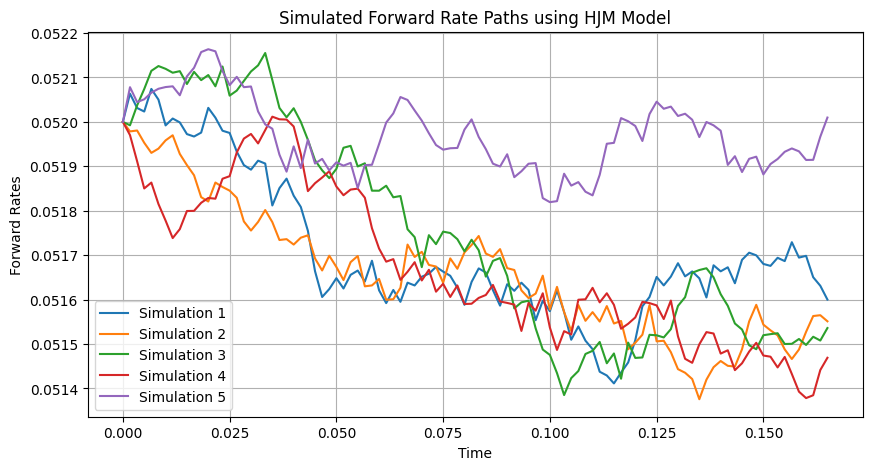

In [47]:
# Plot the simulated forward rate paths
plt.figure(figsize=(10, 5))
for i in range(num_simulations):
    plt.plot(np.arange(0, num_time_steps) * dt, rates[i, :], label=f"Simulation {i+1}")

plt.xlabel('Time')
plt.ylabel('Forward Rates')
plt.title('Simulated Forward Rate Paths using HJM Model')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
def calculate_fixed_rate(notional, forward_rate, start_date, settlement_date):
    time_to_settlement = (settlement_date - start_date).days / 365.0
    fixed_rate = notional / (1 + forward_rate * time_to_settlement)
    return fixed_rate


In [63]:
import datetime

In [64]:
# Example usage
dataset = data['Adj Close']  # Notional amount
forward_rate = 0.052  # Forward rate (as a decimal)
start_date = datetime.date(2023, 1, 1)  # FRA start date
settlement_date = datetime.date(2023, 10, 25)  # FRA settlement date

In [65]:
fixed_rate = calculate_fixed_rate(dataset, forward_rate, start_date, settlement_date)
fixed_rate /10000

Date
2023-01-02    0.000103
2023-01-03    0.000102
2023-01-04    0.000101
2023-01-05    0.000102
2023-01-06    0.000101
                ...   
2023-10-18    0.000101
2023-10-19    0.000101
2023-10-20    0.000102
2023-10-23    0.000102
2023-10-24    0.000102
Name: Adj Close, Length: 212, dtype: float64

In [66]:
fixed_rate.tail()

Date
2023-10-18    1.014385
2023-10-19    1.011071
2023-10-20    1.015674
2023-10-23    1.016007
2023-10-24    1.023671
Name: Adj Close, dtype: float64